## Importing Packages and Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import scipy.stats as stats

sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

import datetime
import scipy.stats as stats
from scipy.stats import norm
import pylab
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.utils.class_weight import compute_class_weight
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
# # from statsmodels.formula.api import ols
# import statsmodels.stats.api as sms
# import statsmodels.api as sm
# from xgboost import XGBClassifier

# from sklearn import metrics
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Importing Dataset to Jupyter Notebooks

In [85]:
DataSet = pd.read_excel("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 7 - Unsupervised Learning\\Credit Card Customer Data.xlsx")
Data = pd.read_excel("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 7 - Unsupervised Learning\\Credit Card Customer Data.xlsx")

In [86]:
DataSet.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## Problem Definition
### Credit Card Users Churn Prediction

<u><b> OBJECTIVE </b></u>
- Explore and visualize the dataset.<br>
- Data Preprocessing. <br>
- K Means Clustering <br>
- Hierarchical Clustering <br>
- Compare clusters from K-means and Hierarchical Clustering and perform cluster profiling <br>
- To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank <br>
- Using clustering algorithms <br>
- Provide recommendations to the bank on how to better market to and service these customers.
- Generate a set of insights and recommendations. <br>


## Basic Information on the Attributes in the Initial DataSet

<u><b> TYPES OF ATTRIBUTES </b></u>

In [87]:
DataSet.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

There are 7 attributes of type INTEGER. <br>
There are 0 attributes of type FLOAT. <br>
There are 0 attributes of type OBJECT. <br>
TOTAL : 7 Attributes. <br>

<u><b> ANY MISSING VALUES IN THE DATASET? </b></u>

In [88]:
DataSet.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are <b> NO </b> Missing values in the Dataset.<br>

<u><b> SUMMARIZED DATASET </b></u>

In [89]:
DataSet.describe(include="all")

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


<u><b> DIMENSIONS OF THE  DATASET (ROWS AND COLUMNS) </b></u>

In [90]:
DataSet.shape

(660, 7)

There are 660 rows and 7 columns

<u><b> CORRELATIONS BETWEEN ATTRIBUTES </b></u>

In [91]:
DataSet.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<u><b> SKEWNESS IN THE DATASET </b></u>

In [92]:
DataSet.skew()

Sl_No                  0.000000
Customer Key           0.051462
Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

- All attributes have POSITIVE SKEW
- Avg_Credit_Limit and Total_visits_online have the HIGHEST positive skew

## Data Pre-Processing I
<b> This part of Data Preprocessing is done to understand the DataSet better and for UNIVARIATE and BIVARIATE Exploratory Data Analysis. <br>Further Data Preprocessing will be done after EDA is complete.</b><br>

In [93]:
df = Data

#### STEP 1 : CHECK FOR DUPLICATE ROWS

In [94]:
df[df.duplicated(subset=None, keep='first')]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


There are <b> NO </b> Duplicated values in the Dataset.<br>

#### STEP 2 : DROP UNNECESSARY COLUMNS
In this case; 
- <b>Sl_No</b> column will not be used to make any deductions. Hence it shall be dropped. 


In [95]:
df.drop(['Sl_No'],axis=1, inplace=True)
df.shape

(660, 6)

The Number of columns has now reduced to 19.

<b> Missing Value Treatment; Outlier Treatment; etc. will be dealt with in Data Preprocessing II</b>

## Univariate Analysis of Variables

<u><b> HISTOGRAM PLOT OF NUMERICAL VARIABLES TO SHOW DISTRIBUTION </b></u>

array([[<AxesSubplot:title={'center':'Customer Key'}>,
        <AxesSubplot:title={'center':'Avg_Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Credit_Cards'}>,
        <AxesSubplot:title={'center':'Total_visits_bank'}>],
       [<AxesSubplot:title={'center':'Total_visits_online'}>,
        <AxesSubplot:title={'center':'Total_calls_made'}>]], dtype=object)

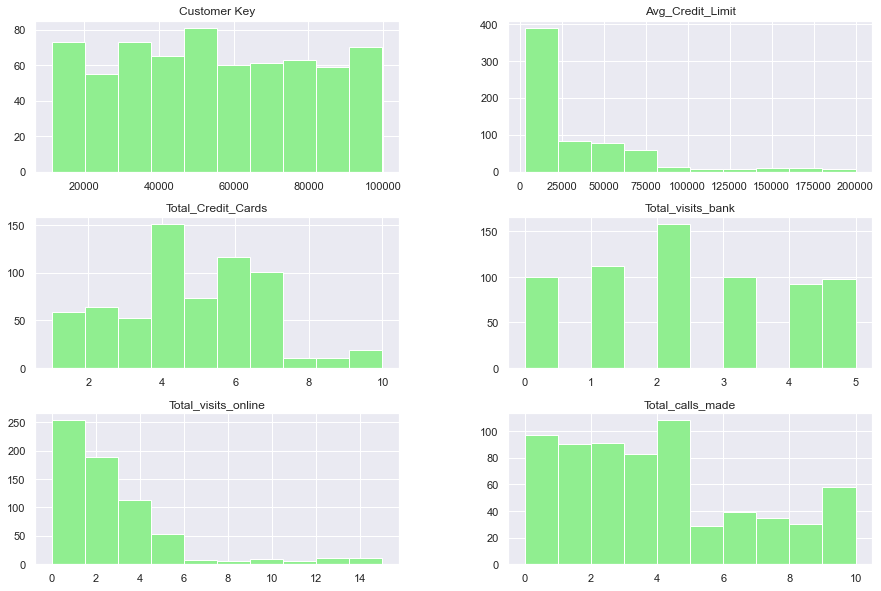

In [96]:
df.hist(figsize=(15,10), color = 'lightgreen')

Histogram Plots of the various numerical Attributes present in the given Dataset. It shows the frequency of each element within the attribute. <br>


<u><b> CUSTOMER KEY DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Customer Key'>

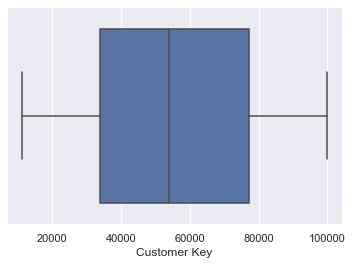

In [97]:
sns.boxplot(df['Customer Key'])

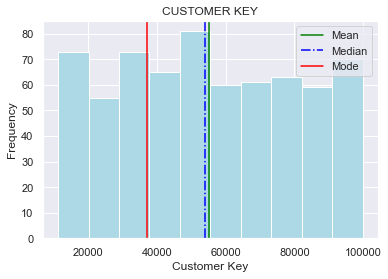

In [98]:
plt.hist(df['Customer Key'], color = 'lightblue')
plt.axvline(df['Customer Key'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Customer Key'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Customer Key'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Customer Key')
plt.ylabel('Frequency')
plt.title("CUSTOMER KEY")
plt.legend()

##### Observations
- Even Distribution
- No significant information can be extracted from this attribute.

<u><b> AVERAGE CREDIT LIMIT DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Avg_Credit_Limit'>

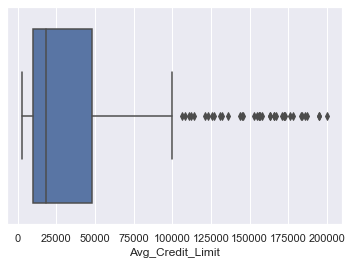

In [99]:
sns.boxplot(df['Avg_Credit_Limit'])

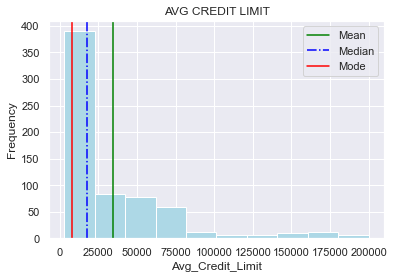

In [100]:
plt.hist(df['Avg_Credit_Limit'], color = 'lightblue')
plt.axvline(df['Avg_Credit_Limit'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Avg_Credit_Limit'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Avg_Credit_Limit'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Frequency')
plt.title("AVG CREDIT LIMIT")
plt.legend()

##### Observations
- Mode < Median < Mean
- Highly Skewed
- Many Outliers
- Most of the customers have a credit limit in the range of 0 - 50000

<u><b> TOTAL CREDIT CARDS DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Total_Credit_Cards'>

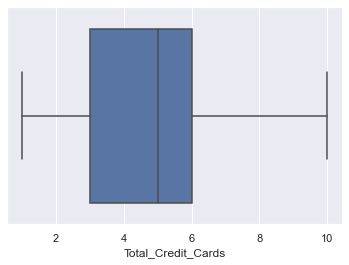

In [101]:
sns.boxplot(df['Total_Credit_Cards'])

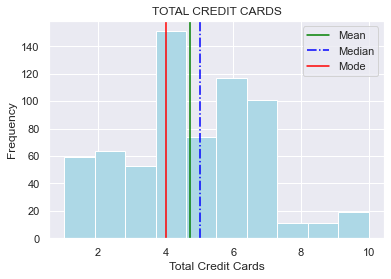

In [102]:
plt.hist(df['Total_Credit_Cards'], color = 'lightblue')
plt.axvline(df['Total_Credit_Cards'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_Credit_Cards'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_Credit_Cards'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Credit Cards')
plt.ylabel('Frequency')
plt.title("TOTAL CREDIT CARDS")
plt.legend()

##### Observations
- Mode < Mean < Median
- Mostly evenly distributed.
- No Outliers
- Most of the customers have a total credit cards in the range of 4 - 7

<u><b> TOTAL VISITS BANK DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Total_visits_bank'>

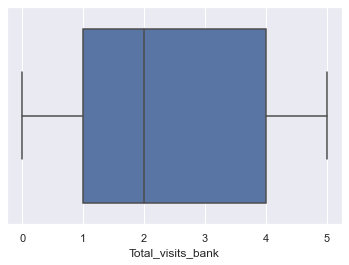

In [103]:
sns.boxplot(df['Total_visits_bank'])

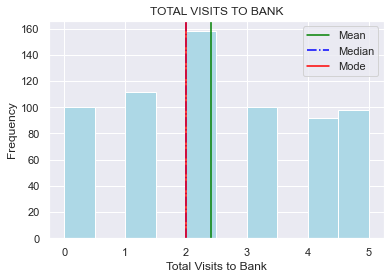

In [104]:
plt.hist(df['Total_visits_bank'], color = 'lightblue')
plt.axvline(df['Total_visits_bank'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_visits_bank'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_visits_bank'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Visits to Bank')
plt.ylabel('Frequency')
plt.title("TOTAL VISITS TO BANK")
plt.legend()

##### Observations
- Mode = Median < Mean
- Most customers have visited the bank only twice. 

<u><b> TOTAL VISITS ONLINE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Total_visits_online'>

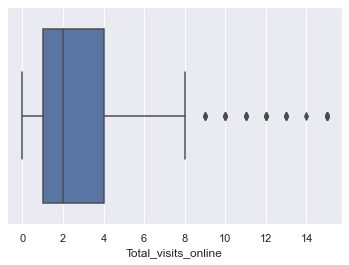

In [105]:
sns.boxplot(df['Total_visits_online'])

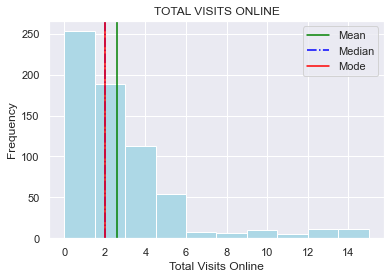

In [106]:
plt.hist(df['Total_visits_online'], color = 'lightblue')
plt.axvline(df['Total_visits_online'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_visits_online'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_visits_online'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Visits Online')
plt.ylabel('Frequency')
plt.title("TOTAL VISITS ONLINE")
plt.legend()

##### Observations
- Mode = Median < Mean
- Highly Skewed
- Outliers present
- Most of the customers have visited the website of the bank online in the range of 0 - 6

<u><b> TOTAL CALLS MADE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Total_calls_made'>

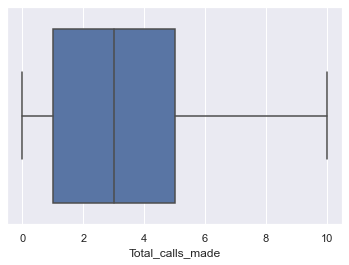

In [107]:
sns.boxplot(df['Total_calls_made'])

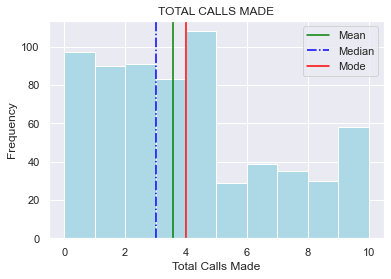

In [108]:
plt.hist(df['Total_calls_made'], color = 'lightblue')
plt.axvline(df['Total_calls_made'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_calls_made'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_calls_made'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Calls Made')
plt.ylabel('Frequency')
plt.title("TOTAL CALLS MADE")
plt.legend()

##### Observations
- Median < Mean < Mode
- No Outliers
- Most of the customers have made calls to the bank in the range of 0 - 5

<u><b> CDF PLOT </b></u>

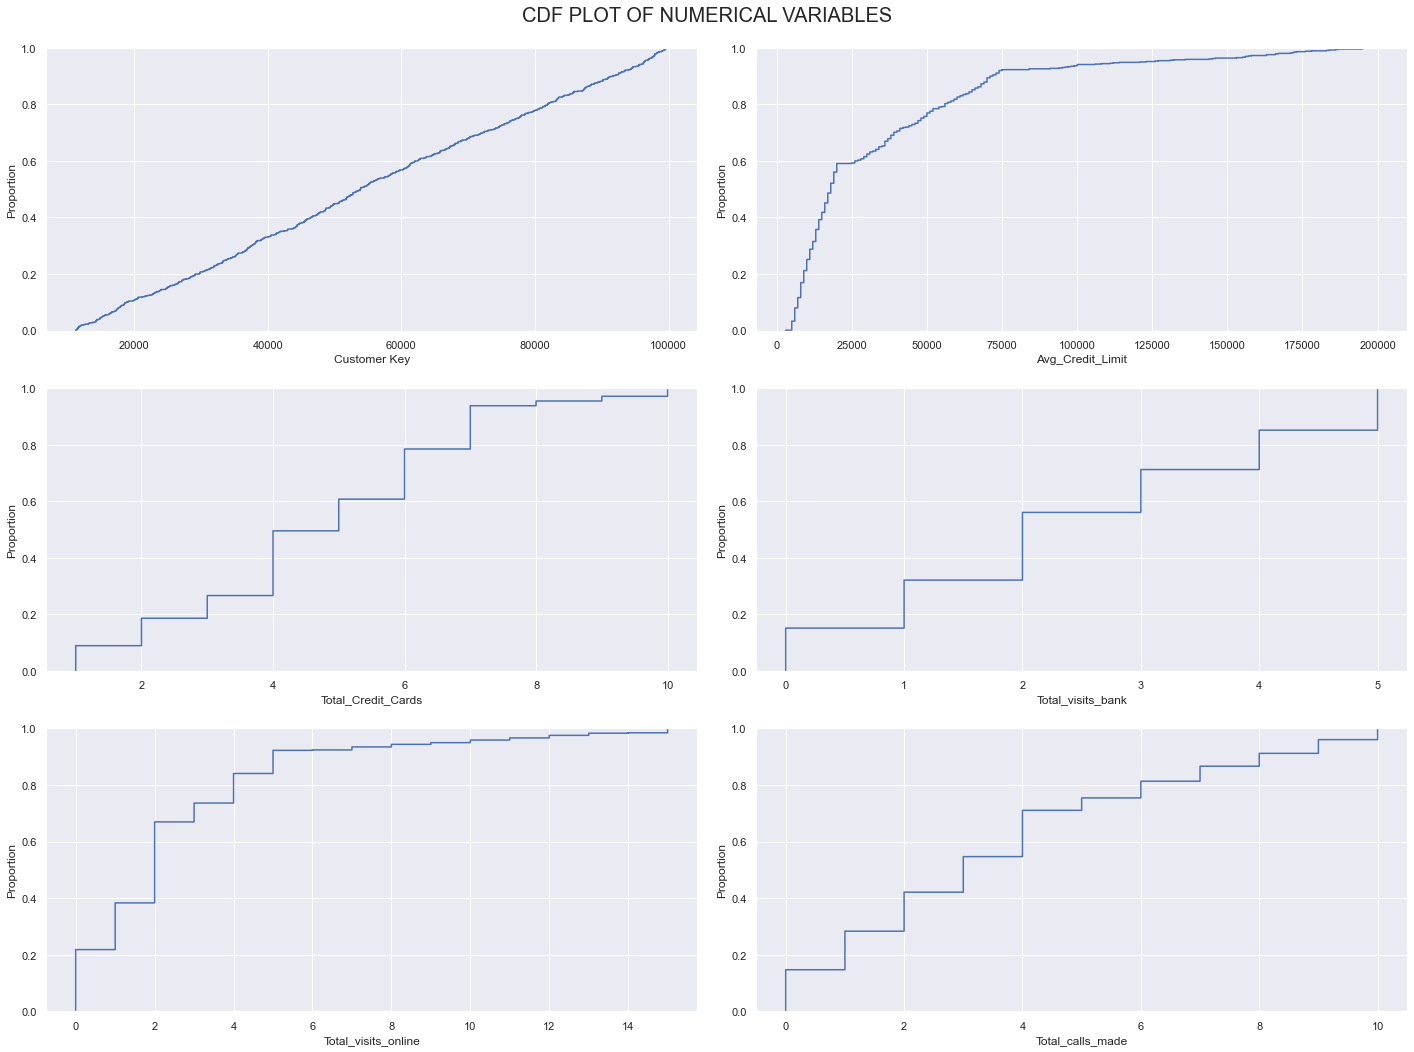

In [109]:

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF PLOT OF NUMERICAL VARIABLES", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 6:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)
    


##### Observations
- Over 90% of the customers have an average credit limit only upto 75000
- 90% of the dataset has upto 7 credit cards only with a very small percentage of customers have 7+ credit cards.
- 80% of the customers have visited the bank upto 4 times. 
- 90% of the customers have made visits to the online website only upto 6 times. only 10% of the customers have visited the online webist more than 7 times. 
- 70% of customers have made calls in the range of 0 - 4. Only the remaining 30% have made 4 or more calls. 

## Bivariate and Multivariate Analysis of Variables

<u><b> HEAT MAP SHOWING CORRELATION BETWEEN VARIABLES </b></u>

<AxesSubplot:>

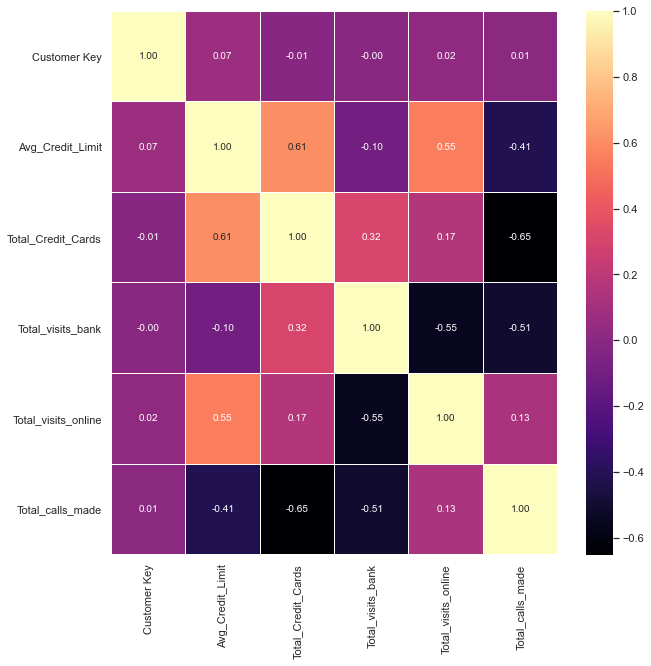

In [110]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt = '.2f', cmap="magma")

##### Observations
This Heat Map shows the correlation between the individual attributes. There is distributed correlation between the attributes of this dataset. With this we can draw the following inferences : 
- <b> HIGH CORRELATION : </b> Avg_Credit_Limit and Total_Credit_Cards, Avg_Credit_Limit and Total_Visits_Online.
- <b> MEDIUM CORRELATION : </b> Total_Credit_Cards and Total_Visits_Bank
- <b> NEGATIVE CORRELATION : </b> Avg_Credit_Limit and Total_Visits_Bank, Avg_Credit_Limit and Total_calls_made, Total_calls_made and Total_Credit_Cards, Total_Visits_Bank and Total_calls_made, Total_Visits_Bank and Total_Visits_Online.

<u><b> PAIRPLOT BETWEEN VARIABLES </b></u>

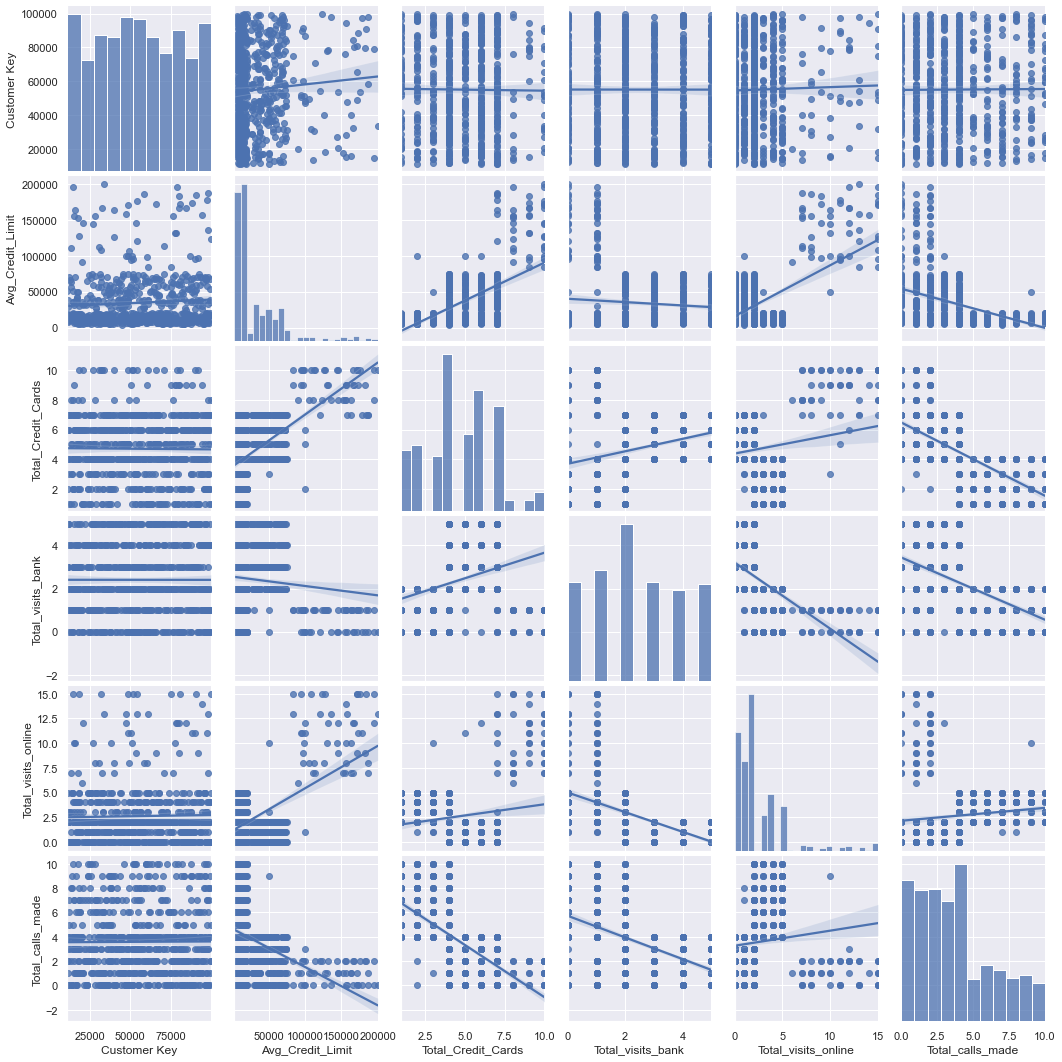

In [111]:
sns.pairplot(df,kind = 'reg')

##### Observations
Pairplot to show the relationship between the different variables. It is a more graphical representation of the Correlation Heat Map. 

<u><b> PREFERRED INTERACTIONS </b></u>

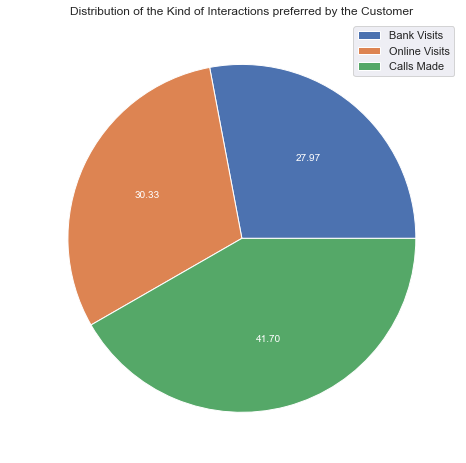

In [112]:
### Creating a new feature with total interaction with banks  for analysis
df2 = df.copy() #Copying the dataset into a new memory
df2['Interactions'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']
communication = ['Total_visits_bank','Total_visits_online','Total_calls_made']
plt.figure(figsize=(12,8))
feature_perc=[]
for feature in communication:
    feature_perc.append((df2[feature].sum()/df2['Interactions'].sum())*100)
plt.pie(feature_perc,labels=['Bank Visits','Online Visits','Calls Made'],autopct='%1.2f',textprops=dict(color="w"))
plt.legend()
plt.title("Distribution of the Kind of Interactions preferred by the Customer")
plt.show()

##### Observations
- Most of the customer (40%) prefers to call the bank rather than visit the website or make personal visits. 
- Bank Visits and Online Visits are almost evenly distributed between in and around 30% each. 

<u><b> AVG CREDIT LIMITS V/S TOTAL CREDIT CARDS </b></u>

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

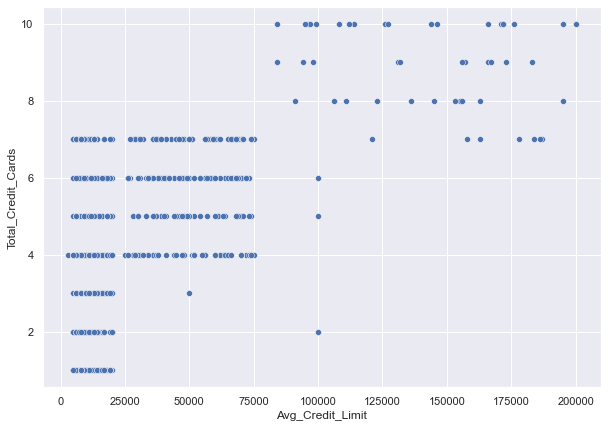

In [113]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards',data=df)

##### Observations
- There are 2 very distinct clusters.
- Cluster 1 : Customers with Avg_Credit_Limit <= 75000 and Total_Credit_Cards <= 7
- Cluster 2 : Customers with Avg_Credit_Limit > 75000 and Total_Credit_Cards > 7
- Greater the Avg_Credit_Limit, greater the number of credit cards a cutsomer has.

<u><b> TOTAL VISITS BANK V/S TOTAL CREDIT CARDS </b></u>

Text(0.5, 0, 'Total_Credit_Cards')

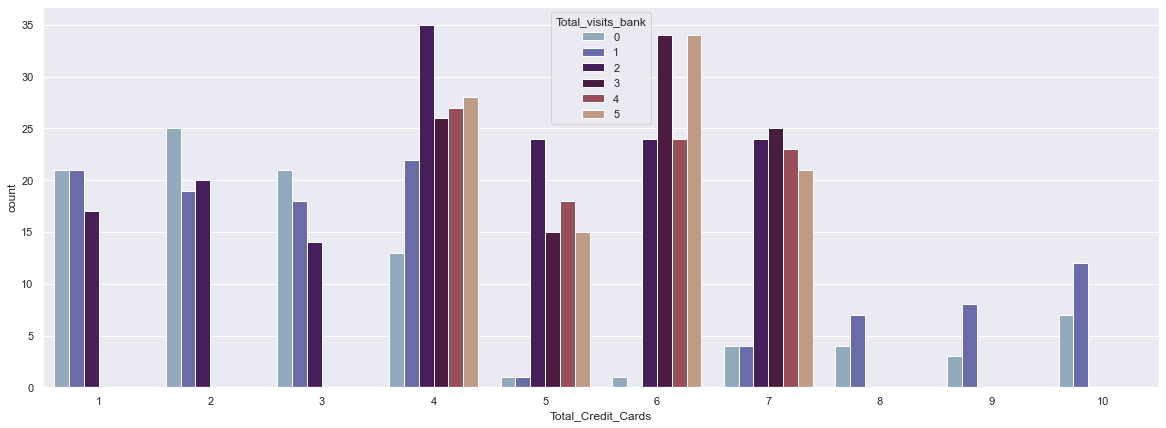

In [114]:
plt.figure(figsize=[20,7])
sns.countplot(x='Total_Credit_Cards', hue='Total_visits_bank', data=df, palette = "twilight");
plt.xlabel('Total_Credit_Cards')


##### Observations
- Total Visits to the bank is at its highest for cutsomers who have credit cards in the range of 4 - 7
- Customers with 8 or more credit cards either never visit the bank or have only visited once. 
- Customers with 3 or less credit cards either never visit the bank or have only visited once or twice.

<u><b> TOTAL VISITS ONLINE V/S TOTAL CREDIT CARDS </b></u>

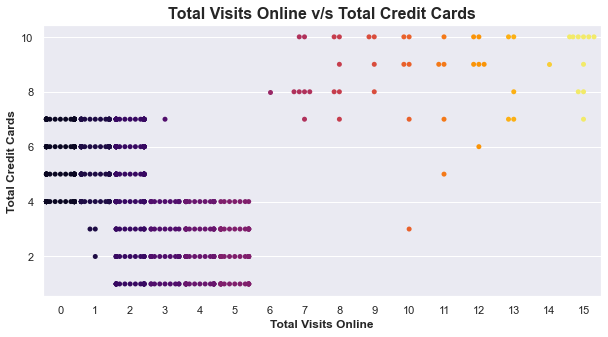

In [115]:
fig = plt.figure(figsize=[10,5]);
sns.swarmplot(data=df, y='Total_Credit_Cards', x='Total_visits_online',palette = 'inferno');
plt.xlabel('Total Visits Online',fontweight='bold');
plt.ylabel('Total Credit Cards', fontweight='bold');
plt.title('Total Visits Online v/s Total Credit Cards', fontsize=16, fontweight='bold');


##### Observations
- There are 2 very distinct clusters.
- Cluster 1 : Customers with Total Visits Online <= 6 and Total_Credit_Cards <= 7
- Cluster 2 : Customers with Total Visits Online > 6 and Total_Credit_Cards > 7
- Greater the number of credit cards a customer has the greater thr number of Total Visits Online.

<u><b> TOTAL CALLS MADE V/S TOTAL CREDIT CARDS </b></u>

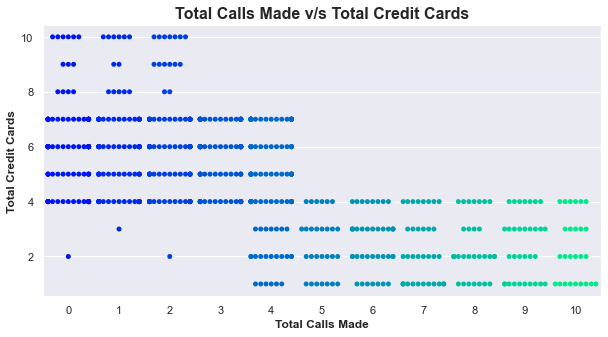

In [146]:
fig = plt.figure(figsize=[10,5]);
sns.swarmplot(data=df, y='Total_Credit_Cards', x='Total_calls_made',palette = 'winter');
plt.xlabel('Total Calls Made',fontweight='bold');
plt.ylabel('Total Credit Cards', fontweight='bold');
plt.title('Total Calls Made v/s Total Credit Cards', fontsize=16, fontweight='bold');


##### Observations
- There are 2 very distinct clusters.
- Cluster 1 : Customers with Total Calls Made <= 4 and Total_Credit_Cards > 4
- Cluster 2 : Customers with Total Visits Online >= 4 and Total_Credit_Cards <= 4
- Greater the number of credit cards a customer has, less likely they are to call the bank. 

<u><b> TOTAL CALLS MADE V/S AVERAGE CREDIT LIMIT </b></u>

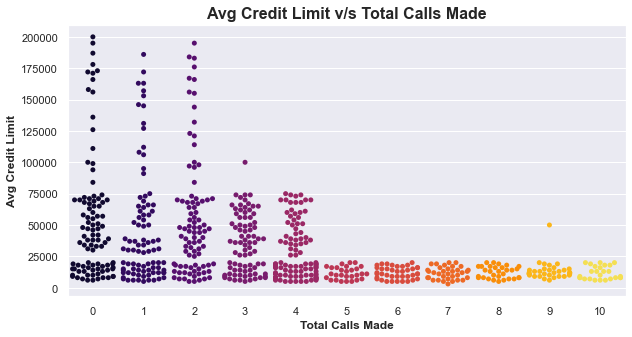

In [134]:
fig = plt.figure(figsize=[10,5]);
sns.swarmplot(data=df, y='Avg_Credit_Limit', x='Total_calls_made',palette = 'inferno');
plt.xlabel('Total Calls Made',fontweight='bold');
plt.ylabel('Avg Credit Limit', fontweight='bold');
plt.title('Avg Credit Limit v/s Total Calls Made', fontsize=16, fontweight='bold');


##### Observations
- Customers that have made 5 or more calls to the bank have Avg_Credit_Limit less than 25000
- Customers who have made 3 - 4 calls to the bank have Avg_Credit_Limit less than or equal to 75000
- Customers who have made 0 - 2 calls to the bank have Avg_Credit_Limit upto 200000
- Number of total calls made to the bank decreases with an increase in Avg Credit Limit.

<u><b> TOTAL VISITS ONLINE V/S AVERAGE CREDIT LIMIT </b></u>

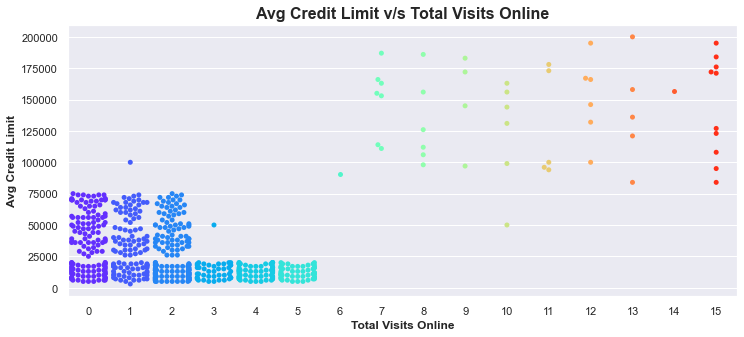

In [140]:
fig = plt.figure(figsize=[12,5]);
sns.swarmplot(data=df, y='Avg_Credit_Limit', x='Total_visits_online',palette = 'rainbow');
plt.xlabel('Total Visits Online',fontweight='bold');
plt.ylabel('Avg Credit Limit', fontweight='bold');
plt.title('Avg Credit Limit v/s Total Visits Online', fontsize=16, fontweight='bold');


##### Observations
- Customers that have made 6 or more online visits have Avg_Credit_Limit greater than 90000
- Customers who have made 3 - 5 online visits have Avg_Credit_Limit less than 25000
- Customers who have made 0 - 2 online visits have Avg_Credit_Limit upto 75000
- Number of online visits or logins to the bank website increases with an increase in Avg Credit Limit.

<u><b> TOTAL VISITS BANK V/S AVERAGE CREDIT LIMIT </b></u>

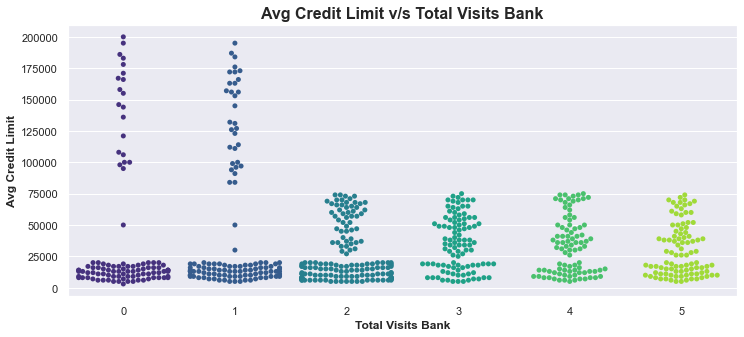

In [143]:
fig = plt.figure(figsize=[12,5]);
sns.swarmplot(data=df, y='Avg_Credit_Limit', x='Total_visits_bank',palette = 'viridis');
plt.xlabel('Total Visits Bank',fontweight='bold');
plt.ylabel('Avg Credit Limit', fontweight='bold');
plt.title('Avg Credit Limit v/s Total Visits Bank', fontsize=16, fontweight='bold');


##### Observations
- Customers that have made 2 or more bank visits have Avg_Credit_Limit upto 80000
- Customers who have made 0 - 2 bank visits have Avg_Credit_Limit upto 200000
- Number of bank visits decreases with an increase in Avg Credit Limit.

### Key Insights based on EDA
- Most of the customers have a credit limit in the range of 0 - 50000
- Most of the customers have a total credit cards in the range of 4 - 7
- Most customers have visited the bank only twice.
- Most of the customers have visited the website of the bank online in the range of 0 - 6
- Most of the customers have made calls to the bank in the range of 0 - 5
- Over 90% of the customers have an average credit limit only upto 75000
- 90% of the dataset has upto 7 credit cards only with a very small percentage of customers have 7+ credit cards.
- 80% of the customers have visited the bank upto 4 times. 
- 90% of the customers have made visits to the online website only upto 6 times. only 10% of the customers have visited the online webist more than 7 times. 
- 70% of customers have made calls in the range of 0 - 4. Only the remaining 30% have made 4 or more calls. 
- Most of the customer (40%) prefers to call the bank rather than visit the website or make personal visits.
- Bank Visits and Online Visits are almost evenly distributed between in and around 30% each.
- Greater the Avg_Credit_Limit, greater the number of credit cards a cutsomer has.
- Total Visits to the bank is at its highest for cutsomers who have credit cards in the range of 4 - 7
- Customers with 8 or more credit cards either never visit the bank or have only visited once.
- Customers with 3 or less credit cards either never visit the bank or have only visited once or twice.
- Greater the number of credit cards a customer has the greater thr number of Total Visits Online.
- Greater the number of credit cards a customer has, less likely they are to call the bank.
- Number of total calls made to the bank decreases with an increase in Avg Credit Limit.
- Customers that have made 6 or more online visits have Avg_Credit_Limit greater than 90000
- Customers who have made 3 - 5 online visits have Avg_Credit_Limit less than 25000
- Customers who have made 0 - 2 online visits have Avg_Credit_Limit upto 75000
- Number of online visits or logins to the bank website increases with an increase in Avg Credit Limit.
- Customers that have made 2 or more bank visits have Avg_Credit_Limit upto 80000
- Customers who have made 0 - 2 bank visits have Avg_Credit_Limit upto 200000
- Number of bank visits decreases with an increase in Avg Credit Limit.


## Data Pre-Processing II
### FEATURE ENGINEERING
<b> This part of Data Preprocessing is done to cater to the Clustering part of the project. It will help in easier development of the Clustering Graphs <br></b>
<u>CONTINUATION</u>

#### STEP 3 : FIXING MISSING VALUES
Missing Values across the Numeric Columns are replaced with the median or mode of the column <br>
There are NO missing values in this dataset. Hence, no fixing is required.  

#### STEP 4 : DROPPING UNNECESSARY COLUMN
In this case, I have also noticed; 
- <b>Customer Key</b> column will not be used to make any deductions. Hence it shall be dropped. 


In [121]:
df.drop(['Customer Key'],axis=1, inplace=True)
df.shape

(660, 5)

#### STEP 5 : CHECK FOR DUPLICATE ROWS
On checking for Duplicated Rows on the new dataframe.

In [122]:
df[df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


In [123]:
#dropping the dupilcated rows
df=df[~df.duplicated()]

In [124]:
df.shape

(649, 5)

#### STEP 5 : OUTLIERS AND THEIR TREATMENT
Identifying the outliers in all columns and treating them <br>

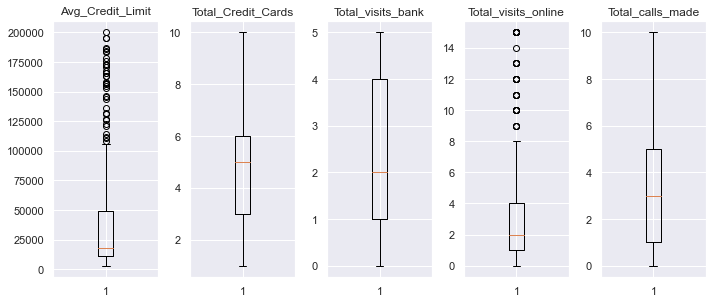

In [127]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10,20))

for i, variable in enumerate(num_col):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In this case, we will not be treating the outliers as they may prove to be important during the building of the boosting and bagging models.

#### STEP 6 : ENCODING VARIABLES
Not Required<br>

#### STEP 7 : STANDARD SCALING

In [128]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)


# creating a dataframe of the scaled columns
final_df = pd.DataFrame(subset_scaled, columns=subset.columns)


In [130]:
final_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


Scaling Complete

## K MEANS CLUSTERING
#### ELBOW METHOD

Number of Clusters: 1 	Average Distortion: 2.007896349270688
Number of Clusters: 2 	Average Distortion: 1.4576197022077821
Number of Clusters: 3 	Average Distortion: 1.1434401208195095
Number of Clusters: 4 	Average Distortion: 1.0435538595477063
Number of Clusters: 5 	Average Distortion: 0.9876932950805294
Number of Clusters: 6 	Average Distortion: 0.9400838295779785
Number of Clusters: 7 	Average Distortion: 0.9069417885786603
Number of Clusters: 8 	Average Distortion: 0.8871445822197129


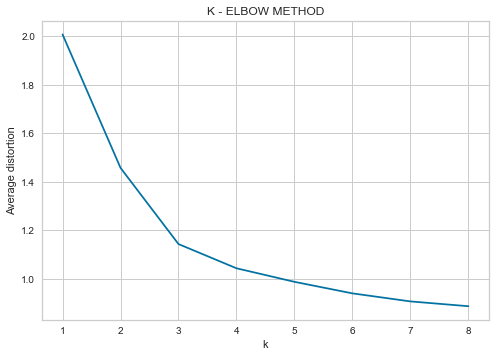

In [151]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(final_df)
    prediction = model.predict(final_df)
    distortion = (
        sum(
            np.min(cdist(final_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / final_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("K - ELBOW METHOD")
plt.show()

#### Observations
Judging by the graph created above, appropriate value for <b> k can be picked as 3</b>. <br>
k = 2 can also be considered

#### CHECKING SILHOUETTE SCORES

For n_clusters = 2, the silhouette score is 0.41800025566689647)
For n_clusters = 3, the silhouette score is 0.516281010855363)
For n_clusters = 4, the silhouette score is 0.3570238219413198)
For n_clusters = 5, the silhouette score is 0.2730908848204728)
For n_clusters = 6, the silhouette score is 0.25719485802606895)
For n_clusters = 7, the silhouette score is 0.24825112050393752)
For n_clusters = 8, the silhouette score is 0.2260684384828419)
For n_clusters = 9, the silhouette score is 0.21822102395741014)


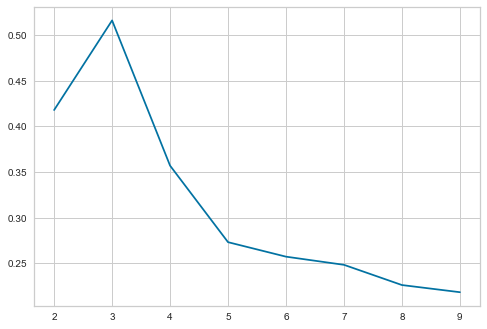

In [152]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((final_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(final_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

#### Observations
Judging by the graph created above, appropriate value for <b> k can be picked as 3</b>.<br>
k = 3 has the highest silhouette score.

#### FINDING OPTIMAL NUMBER OF CLUSTERS

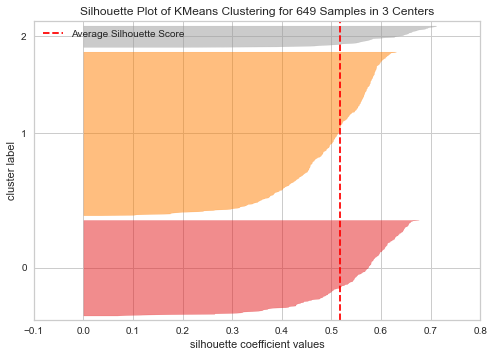

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [153]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(final_df)
visualizer.show()


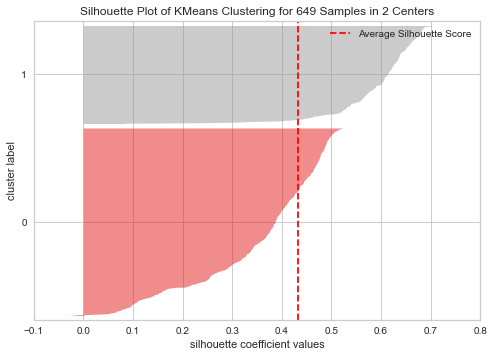

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [155]:
#Visualization for k = 2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(final_df)
visualizer.show()


#### Observations
- OPTIMAL NUMBER OF CLUSTERS = 3
- k = 3 shows a better plot and silhouette score than k = 2

## HIERARCHICAL CLUSTERING
We will use 4 DISTANCE METRICS with different LINKAGE METHODS to find the BEST Cophenetic Correlation.<br>
### 1) Finding Cophenetic Correlation

#### EUCLIDEAN DISTANCE

In [165]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(final_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(final_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8782863872563746.
Cophenetic correlation for complete linkage is 0.8854872581962318.
Cophenetic correlation for average linkage is 0.9167886114950704.
Cophenetic correlation for centroid linkage is 0.9140343756244551.
Cophenetic correlation for ward linkage is 0.7756167152597446.
Cophenetic correlation for weighted linkage is 0.9107193273405108.


In [166]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9167886114950704, which is obtained with average linkage.


#### CHEBYSHEV DISTANCE

In [169]:
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(final_df, metric="chebyshev", method=lm)
    c, coph_dists = cophenet(Z, pdist(final_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "chebyshev"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8976424680148912.
Cophenetic correlation for complete linkage is 0.8731535021949083.
Cophenetic correlation for average linkage is 0.9155524410807189.
Cophenetic correlation for weighted linkage is 0.8894795319631006.


In [170]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9155524410807189, which is obtained with average linkage.


#### MAHALANOBIS DISTANCE

In [171]:
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(final_df, metric="mahalanobis", method=lm)
    c, coph_dists = cophenet(Z, pdist(final_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "mahalanobis"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8953021845210309.
Cophenetic correlation for complete linkage is 0.5766593216714142.
Cophenetic correlation for average linkage is 0.8455737900742861.
Cophenetic correlation for weighted linkage is 0.8276434296808391.


In [172]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8953021845210309, which is obtained with single linkage.


#### CITYBLOCK / MANHATTAN DISTANCE

In [173]:
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(final_df, metric="cityblock", method=lm)
    c, coph_dists = cophenet(Z, pdist(final_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "cityblock"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8402227893582106.
Cophenetic correlation for complete linkage is 0.8897533482434944.
Cophenetic correlation for average linkage is 0.9147653836283022.
Cophenetic correlation for weighted linkage is 0.892493133316226.


In [174]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9147653836283022, which is obtained with average linkage.


<b><u> OBSERVATIONS </u></b>
- Across all the distances, the BEST COPHENETIC CORRELATION has been given by <b> Average Linkage </b> except in the case of MAHANOLOBIS DISTANCE where the best result was given by <b> Single Linkage </b>
- EUCLIDEAN DISTANCE + AVERAGE LINKAGE has given the BEST COPHENETIC CORRELATION

### 2) Dendogram Construction
For Euclidean, Manhattan and Chebyshev distances.<br>
Mahalanobis Distance had low cophenetic correlation for the various linkages and is therefore being ignored.<br>

#### EUCLIDEAN DISTANCE

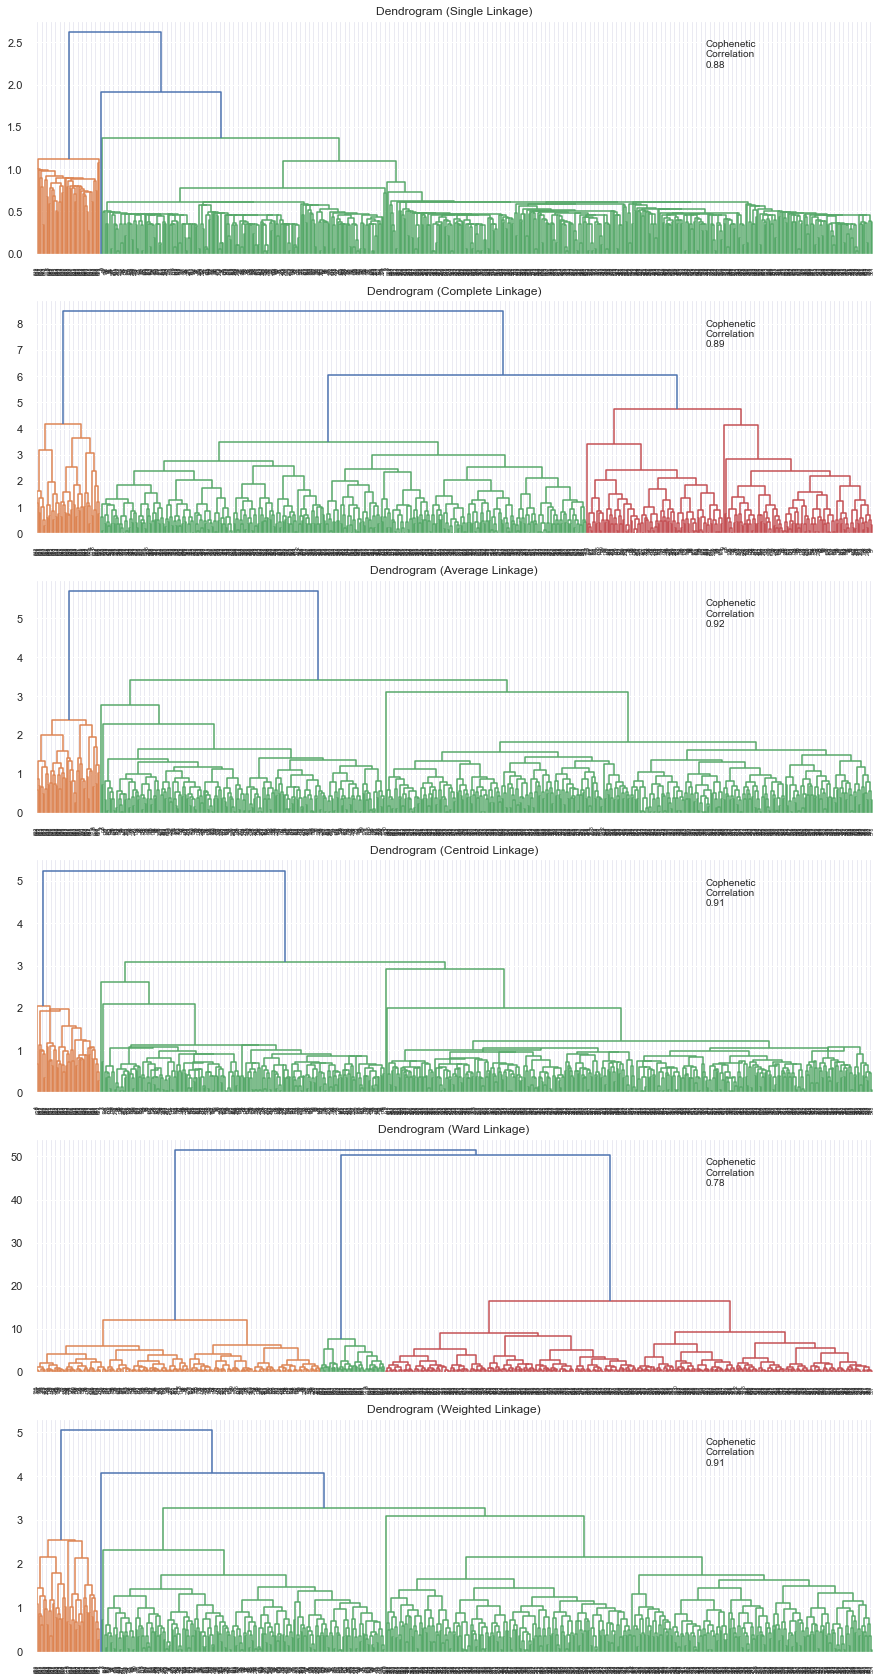

In [180]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(final_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(final_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

#### CITYBLOCK / MANHATTAN DISTANCE

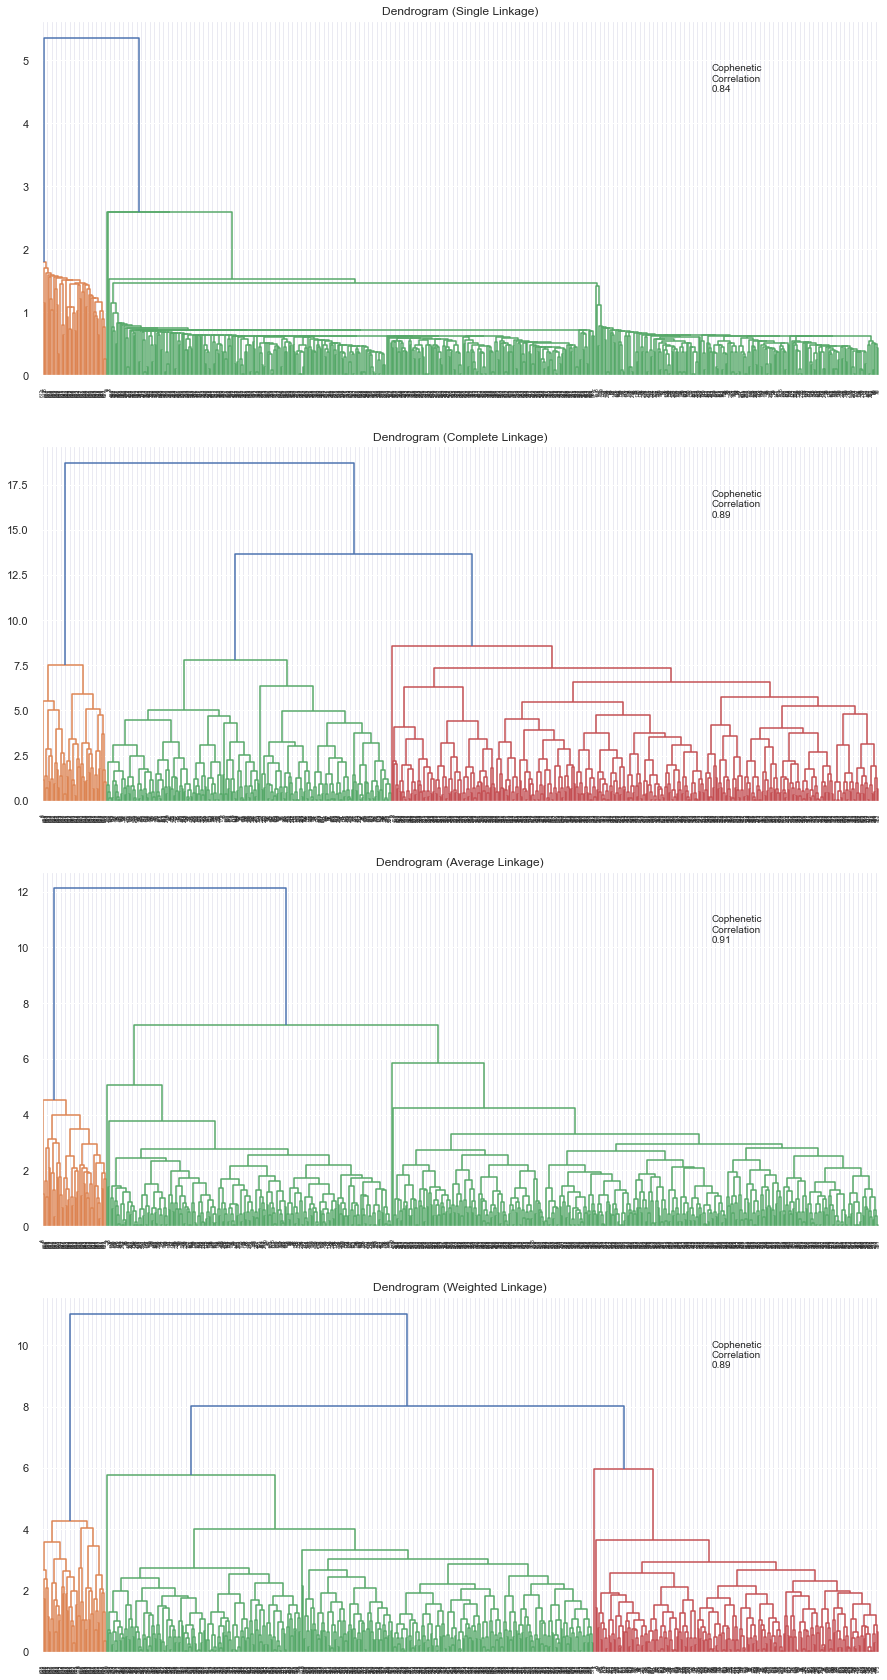

In [179]:
linkage_methods = ["single", "complete", "average", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(final_df, metric="cityblock", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(final_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

#### CHEBYSHEV DISTANCE

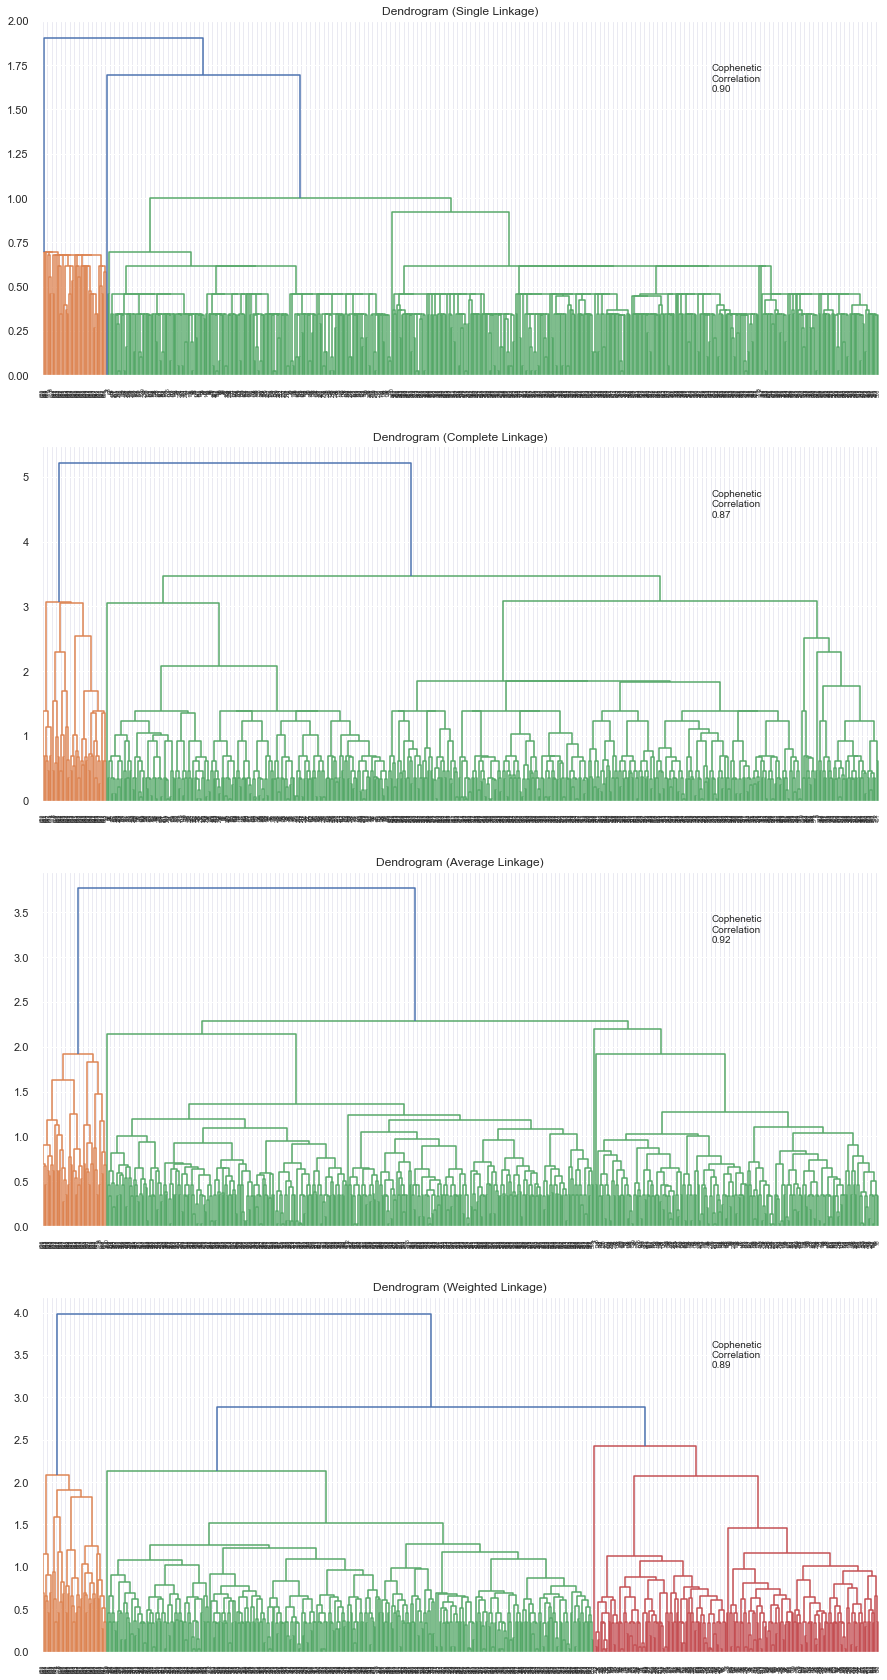

In [181]:
linkage_methods = ["single", "complete", "average", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(final_df, metric="chebyshev", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(final_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

#### 3) FINDING OPTIMAL NUMBER OF CLUSTERS
#### Observations
- Based on all the dendograms seen above, we can conclude that the graph formed by Euclidean Distance with Ward Linkage is the best combination as it gave us separate and distinct clusters.
- OPTIMAL NUMBER OF CLUSTERS = 3 based on the dendogram Euclidean Distance with Ward Linkage

## CLUSTER PROFILING
### 1) K MEANS CLUSTERING

In [269]:
# adding kmeans cluster labels to the original and scaled dataframes
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(final_df)

df10 = df.copy()
df11 = pd.DataFrame(df10)

df20 = final_df.copy()
df21 = pd.DataFrame(df20)

df11["kmeans_clusters"] = kmeans.labels_
df21["kmeans_clusters"] = kmeans.labels_


In [270]:
cluster_profile1 = df11.groupby("kmeans_clusters").mean()


In [271]:
cluster_profile1["count_in_each_segments"] = (
    df11.groupby("kmeans_clusters")["Avg_Credit_Limit"].count().values
)
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
kmeans_clusters,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,34071.428571,5.518519,3.484127,0.981481,1.992063,378
2,12239.819005,2.411765,0.945701,3.561086,6.891403,221


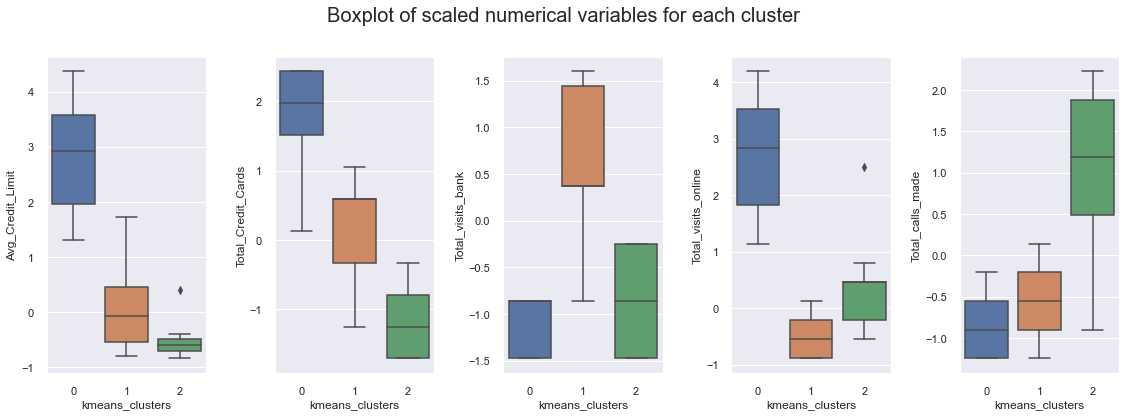

In [272]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=df21[num_col[counter]],
        x=df21["kmeans_clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

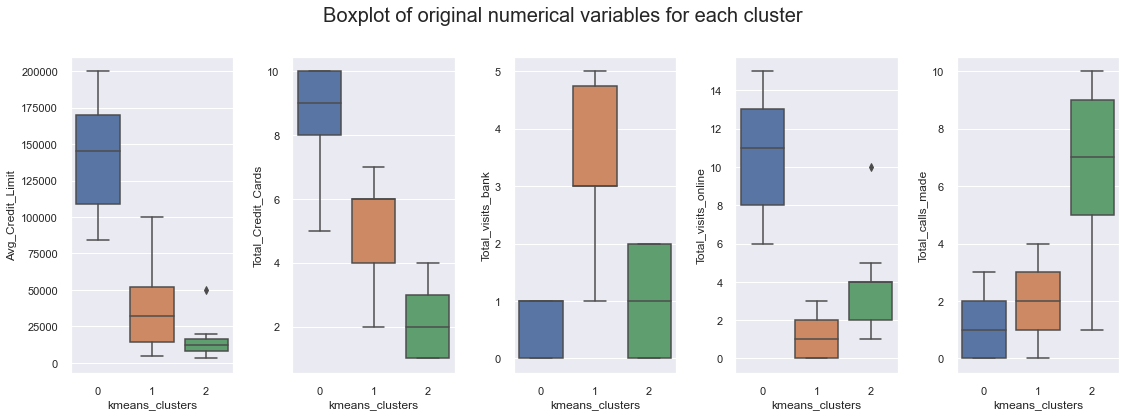

In [273]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df11[num_col[counter]], x=df11["kmeans_clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### K Means Cluster Insights
- <b> CLUSTER 0 </b> : High Average Credit Limit, Hold large number of Credit Cards, Rarely ever visits the bank, Highest online visits, Very low number of calls.
- <b> CLUSTER 1 </b> : 12500 - 50000 Average Credit Limit, 4 - 6 Credit Cards, Highest visits to bank, Does not visit online banking, Low number of calls.
- <b> CLUSTER 2 </b> : Lowest Average Credit Limit, 0 - 3 Credit cards, 0 - 2 visits to bank, 2 - 4 visits to online banking, Highest calls made to bank.

### 1) HIERARCHICAL CLUSTERING

In [278]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(final_df)

df12 = pd.DataFrame(df10)

df22 = pd.DataFrame(df20)

df12["HC_Clusters"] = HCmodel.labels_
df22["HC_Clusters"] = HCmodel.labels_

In [279]:
cluster_profile2 = df12.groupby("HC_Clusters").mean()

In [280]:
cluster_profile2["count_in_each_segments2"] = (
    df12.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)
cluster_profile2.drop("kmeans_clusters",axis=1,inplace=True)
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments2
HC_Clusters,,,,,,
0,34143.236074,5.519894,3.488064,0.978780,1.986737,377
1,12216.216216,2.423423,0.950450,3.554054,6.878378,222
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


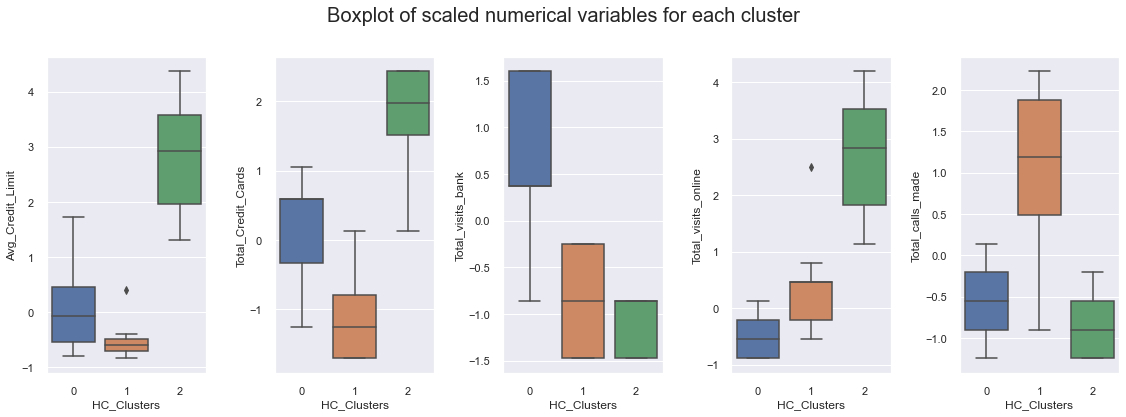

In [281]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=df22[num_col[counter]],
        x=df22["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

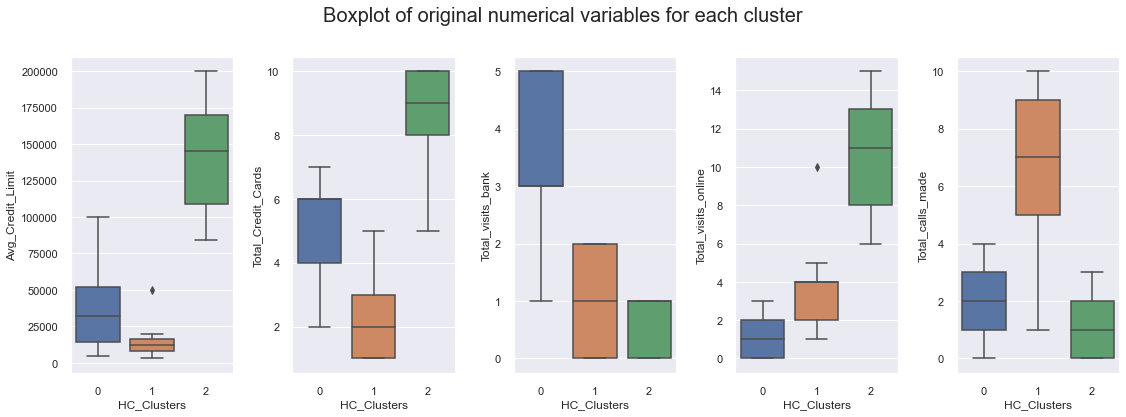

In [282]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df12[num_col[counter]], x=df12["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Hierarchical Cluster Insights
- <b> CLUSTER 0 </b> : 12500 - 50000 Average Credit Limit, 4 - 6 Credit Cards, Highest visits to bank, Does not visit online banking, Low number of calls.
- <b> CLUSTER 1 </b> : Lowest Average Credit Limit, 0 - 3 Credit cards, 0 - 2 visits to bank, 2 - 4 visits to online banking, Highest calls made to bank.
- <b> CLUSTER 2 </b> : High Average Credit Limit, Hold large number of Credit Cards, Rarely ever visits the bank, Highest online visits, Very low number of calls.

## COMPARING K MEANS AND HIERARCHICAL CLUSTERING
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [289]:
y_kmeans = kmeans.fit_predict(final_df)

In [290]:
y_hc = HCmodel.fit_predict(final_df)

In [291]:
kmeans_score= silhouette_score(df21,y_kmeans)
kmeans_score


0.5616172833106032

In [292]:
hc_score= silhouette_score(df22,y_hc)
hc_score

0.5608391564202945


#### Observations
- Both K Means and Hierarchical Clustering have an average silhouette score of 0.56 which is a good score signifying that the clusters a mostly well formed and distinct. 
- Both K Means and Hierarchical Clustering have similar scores with k means having a slightly higher score signifying it is marginally better than Hierarchical Clustering. 
- Both algorithms more or less created clusters with the same clustering profiles. 

## Business Recommendations
### K MEANS CLUSTERS
- <b> CLUSTER 0 </b> : This cluster seems to indicate that they are the premium customers with higher income. They can be offered premium deals and can be given online shopping deals as they show more affinity towards it. 
- <b> CLUSTER 1 </b> : Can be targeted for better in person marketing as they tend to come to the bank more. Use medium number of credit cards so can be targeted for more purchase of credit cards. Bank managers can use promotional ads in bank to lure more customers. 
- <b> CLUSTER 2 </b> : Can be targeted through promotions through phone calls as they use this medium the most. Feedback can also be taken in through phone to encourage better service. Low number of credit cards, so can be targeted for low budget credit cards. 

### HIERARCHICAL CLUSTERS
- <b> CLUSTER 0 </b> : Better service in banks to lure more customers that make higher visits to banks. more adveritisements, offers and coupons provided in bank. Mediocre credit limit, keeping this in mind more taregted promotions can be developed. 
- <b> CLUSTER 1 </b> : Promotions through phone calls. Targeted promotion based on their low income level. Draw interest towards credit cards for low income individuals. 
- <b> CLUSTER 2 </b> : Affluent customers that prefer online banking. More targeted promotions through online means. Can pitch credit cards with higher spending limits.
